# Environment Set Up

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
data = pd.ExcelFile('DataDownload.xls')

# Goals and Objectives

The goal of this project is to study the distribution of SNAP benefits at country level and look into key drivers for high or low levels of benefit. Specifically we will build of model to predict the SNAP benefits per capita in 2015, given a set of food, store availability and county demographic features. The model will be at County Level.

The model will give us some key insights on any inequality in SNAP benefit distribution across counties. In particular we are interested in finding those Counties for which out model predicts a high level of SNAP benefit per capita, but that instead are underperforming. Those Counties should be the focus for State autorities.

The data is taken from the Food Environment Atlas 2018, published by the United States Department of Agriculture.

In [2]:
print(data.sheet_names)

['Read_Me', 'Variable List', 'Supplemental Data - County', 'Supplemental Data - State', 'ACCESS', 'STORES', 'RESTAURANTS', 'ASSISTANCE', 'INSECURITY', 'PRICES_TAXES', 'LOCAL', 'HEALTH', 'SOCIOECONOMIC']


# Data Exploration

Now we will look into different sections of data.

In [3]:
# The file contain metadata with variable meaning, which will help understanding which variable are more relevant.
metadata = data.parse('Variable List')
metadata.head()

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent


### 1) Explore Assistance Tab

The Assistance Tab provides a set of variables related to the distribution of SNAP benefits and other similar programs across Counties and States. This is the part of the data where we will find our Target Variable, the variable we want to model and predict.

In [4]:
assistance = data.parse('ASSISTANCE')
assistance.head()

,FIPS,State,County,REDEMP_SNAPS12,REDEMP_SNAPS16,PCH_REDEMP_SNAPS_12_16,PCT_SNAP12,PCT_SNAP16,PCH_SNAP_12_16,PC_SNAPBEN10,...,REDEMP_WICS08,REDEMP_WICS12,PCH_REDEMP_WICS_08_12,PCT_WIC09,PCT_WIC15,PCH_WIC_09_15,PCT_CACFP09,PCT_CACFP15,PCH_CACFP_09_15,FDPIR12
0,1001,AL,Autauga,301432.081069,239024.015573,-20.703856,18.824675,16.976436,-1.848239,16.692321,...,161658.70,184744.3,14.280490,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
1,1003,AL,Baldwin,274394.503663,155844.390189,-43.204260,18.824675,16.976436,-1.848239,14.139211,...,125840.50,126639.4,0.634881,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
2,1005,AL,Barbour,325496.560766,281716.325972,-13.450291,18.824675,16.976436,-1.848239,27.558243,...,178230.60,157077.1,-11.868620,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
3,1007,AL,Bibb,356444.032000,256026.919660,-28.171916,18.824675,16.976436,-1.848239,20.128737,...,92542.33,98263.4,6.182112,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
4,1009,AL,Blount,229730.022632,141304.900673,-38.490886,18.824675,16.976436,-1.848239,19.157857,...,102945.90,149110.0,44.843050,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0


In [5]:
# This dataset contains many columns; let's see what they mean
assistance_variables = metadata[metadata['Variable Code'].isin(assistance.columns)]
assistance_variables

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
93,Food Assistance,ASSISTANCE,SNAP,"SNAP redemptions/SNAP-authorized stores, 2012",REDEMP_SNAPS12,CNTY10,Dollars/store
94,Food Assistance,ASSISTANCE,SNAP,"SNAP redemptions/SNAP-authorized stores, 2016",REDEMP_SNAPS16,CNTY10,Dollars/store
95,Food Assistance,ASSISTANCE,SNAP,SNAP redemptions/SNAP-authorized stores (% cha...,PCH_REDEMP_SNAPS_12_16,CNTY10,% change
96,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (% pop), 2012*",PCT_SNAP12,CNTY10,Percent
97,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (% pop), 2016*",PCT_SNAP16,CNTY10,Percent
98,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (change % pop), 2012-16*",PCH_SNAP_12_16,CNTY10,Percentage points
99,Food Assistance,ASSISTANCE,SNAP,"SNAP benefits per capita, 2010",PC_SNAPBEN10,CNTY10,Dollars/capita
100,Food Assistance,ASSISTANCE,SNAP,"SNAP benefits per capita, 2015",PC_SNAPBEN15,CNTY10,Dollars/capita
101,Food Assistance,ASSISTANCE,SNAP,"SNAP benefits per capita (% change), 2010-15",PCH_PC_SNAPBEN_10_15,CNTY10,% change
102,Food Assistance,ASSISTANCE,SNAP,"SNAP participants (% eligible pop), 2008*",SNAP_PART_RATE08,CNTY10,Percent


The variable **PC_SNAPBEN15** is our variable of interest. This is the variable that we want to predict given a set of features. 

As we can see below Counties have in average 17.6 dollars per capita, with a Max of 100 dollars per capita in some Counties. The data is not exactly distributed as a Gaussian, but is right skewed. We will make further exploration of this data in future notebooks

count    3059.000000
mean       17.625872
std         9.648528
min         0.863202
25%        10.601362
50%        16.146207
75%        22.638639
max       100.139353
Name: PC_SNAPBEN15, dtype: float64


Text(0, 0.5, 'Counties')

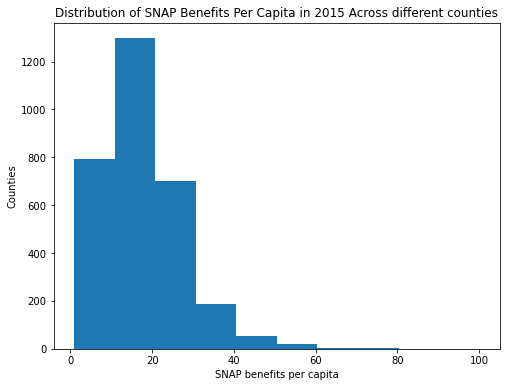

In [6]:
target = assistance['PC_SNAPBEN15']
print(target.describe())

# Plot Histogram
plt.figure(figsize = (8,6))
plt.hist(target)
plt.title("Distribution of SNAP Benefits Per Capita in 2015 Across different counties")
plt.xlabel("SNAP benefits per capita")
plt.ylabel("Counties")

After isolating the target variable we will take a closer look to the features available in the Assistance tab. We want to discard features that relate to period after 2015 and the features that are too far back in the past. We should be very cautious with including Assistance variable for 2015, since those could be too correlated with the target variable and cause Data Leakage https://www.analyticsvidhya.com/blog/2021/07/data-leakage-and-its-effect-on-the-performance-of-an-ml-model/

Therefore interesting features in this part of the data could be.

1. *REDEMP_SNAPS12* = SNAP redemptions/SNAP-authorized stores, 2012
2. *PCT_SNAP12* = SNAP participants (% pop), 2012*
3. *PC_SNAPBEN10* = SNAP participants (% pop), 2010*
4. *SNAP_PART_RATE13* = SNAP participants (% eligible pop), 2013
5. *PCT_FREE_LUNCH14* = Students eligible for free lunch (%), 2014
6. *PCT_REDUCED_LUNCH14* = Students eligible for reduced-price lunch (%),..
7. *PC_WIC_REDEMP12* = WIC redemptions per capita, 2012
8. *REDEMP_WICS12* = WIC redemptions/WIC-authorized stores


Now that we have isolated some variables let's look how they are distributed. In a later exploratory notebook we will make a deep dive analysis to see how those are correlated to the target variable.

In [7]:
# This dataset contains many columns; let's see what they mean
assistance_sub = assistance[['State',
                             'County',
                             'REDEMP_SNAPS12',
                             'PCT_SNAP12',
                             'PC_SNAPBEN10',
                             'PC_SNAPBEN15',
                             'SNAP_PART_RATE13',
                             'PCT_FREE_LUNCH14',
                             'PCT_REDUCED_LUNCH14',
                             'PC_WIC_REDEMP12',
                             'REDEMP_WICS12'
                            ]]

assistance_sub.describe()

,REDEMP_SNAPS12,PCT_SNAP12,PC_SNAPBEN10,PC_SNAPBEN15,SNAP_PART_RATE13,PCT_FREE_LUNCH14,PCT_REDUCED_LUNCH14,PC_WIC_REDEMP12,REDEMP_WICS12
count,2.901000e+03,3143.000000,3060.000000,3059.000000,3143.000000,2905.000000,2905.000000,2004.000000,2004.000000
mean,2.551360e+05,15.148961,18.614255,17.625872,86.460281,45.975352,7.686163,19.154266,110173.598400
std,1.256706e+05,3.604832,9.572083,9.648528,8.916914,18.089541,3.742588,9.881650,62915.262314
min,0.000000e+00,5.866367,1.013588,0.863202,56.955000,0.000000,0.000000,0.139449,464.750000
25%,1.642409e+05,12.566062,11.367797,10.601362,79.024000,33.333333,5.505033,13.037968,67183.202500
50%,2.577948e+05,15.223027,17.445385,16.146207,86.331000,44.124491,7.730812,17.532905,99297.805000
75%,3.351987e+05,18.353499,24.124433,22.638639,92.597000,55.671331,9.903968,23.411550,143023.850000
max,1.253321e+06,22.131516,76.284852,100.139353,100.000000,100.000000,32.051282,131.366500,487424.000000


### 2) Explore Access Tab

The Access tab provides a set of variables focusing on populations that lack easy access to stores where they can buy food, by State and County.

In [8]:
access = data.parse('ACCESS')
access.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


In [9]:
# This dataset contains many columns; let's see what they mean
access_variables = metadata[metadata['Variable Code'].isin(access.columns)]
access_variables

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent
5,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store, 2010",LACCESS_LOWI10,CNTY10,Count
6,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store, 2015",LACCESS_LOWI15,CNTY10,Count
7,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (% change), 2...",PCH_LACCESS_LOWI_10_15,CNTY10,% change
8,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (%), 2010",PCT_LACCESS_LOWI10,CNTY10,Percent
9,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (%), 2015",PCT_LACCESS_LOWI15,CNTY10,Percent


As shown above, all data in the Access tab is from either 2010 or 2015.  To avoid data leakage, we will focus mostly on data from 2010.  However, the only data regarding households receiving SNAP benefits is from 2015.  We will include them because they're what we have, but we should be mindful of anything that looks too convenient involving LACCESS_SNAP15 or PCT_LACCESS_SNAP15.

In [10]:
# This dataset contains many columns; let's see what they mean
access_sub = access[['State',
                     'County',
                     'LACCESS_POP10',
                     'PCT_LACCESS_POP10',
                     'LACCESS_LOWI10',
                     'PCT_LACCESS_LOWI10',
                     'LACCESS_HHNV10',
                     'PCT_LACCESS_HHNV10',
                     'LACCESS_SNAP15',
                     'PCT_LACCESS_SNAP15',
                     'LACCESS_CHILD10',
                     'PCT_LACCESS_CHILD10',
                     'LACCESS_SENIORS10',
                     'PCT_LACCESS_SENIORS10'
                     ]]

access_sub.describe()

,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_HHNV10,PCT_LACCESS_HHNV10,LACCESS_SNAP15,PCT_LACCESS_SNAP15,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3123.000000,3123.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,20156.653242,23.559330,5551.776559,8.374953,660.785705,3.154496,804.471927,2.917896,4959.224239,5.505321,2682.189398,3.915474
std,51308.865791,20.250176,13862.922934,8.214988,1121.141847,3.207105,1870.844498,3.160642,13169.301375,4.880426,6526.594320,4.215192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1661.076794,10.847099,592.983070,3.442171,118.101203,1.609832,68.476725,1.132022,365.133646,2.396962,276.522480,1.585764
50%,4097.827186,19.685956,1500.780036,6.150772,320.065422,2.572299,218.176102,2.128783,937.758224,4.444210,676.500491,2.827295
75%,12954.123206,29.581054,4591.067541,10.324935,706.480605,3.806324,687.003195,3.668171,3008.123733,6.964972,1863.454529,4.521918
max,886068.668386,100.000001,292541.789025,72.274456,16334.423176,68.470405,29461.297953,37.254488,260308.794094,34.015595,78922.918719,29.208633


### 3) Explore Stores Tab

The Stores tab focuses on the number of food stores of various types in each county, including variables for the number of SNAP-authorized stores.

In [11]:
stores = data.parse('STORES')
stores.head()

,FIPS,State,County,GROC09,GROC14,PCH_GROC_09_14,GROCPTH09,GROCPTH14,PCH_GROCPTH_09_14,SUPERC09,...,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12
0,1001,AL,Autauga,6,4,-33.333333,0.110834,0.072209,-34.849716,1,...,12.694878,0.674004,0.760911,12.894172,6,5,-16.66667,0.119156,0.090067,-24.412460
1,1003,AL,Baldwin,24,29,20.833333,0.133775,0.144920,8.331001,6,...,43.192771,0.725055,0.949753,30.990390,25,27,8.00000,0.141875,0.141517,-0.252126
2,1005,AL,Barbour,5,5,0.000000,0.180786,0.185963,2.863838,0,...,0.956938,1.280590,1.354387,5.762745,6,7,16.66667,0.201099,0.257344,27.968330
3,1007,AL,Bibb,6,5,-16.666667,0.261540,0.222163,-15.055985,1,...,20.512821,0.719122,0.864874,20.267995,6,5,-16.66667,0.277919,0.221268,-20.383970
4,1009,AL,Blount,6,6,0.000000,0.104637,0.103952,-0.654897,1,...,23.903509,0.657144,0.815946,24.165470,10,6,-40.00000,0.173028,0.103760,-40.033200


In [12]:
# This dataset contains many columns; let's see what they mean
stores_variables = metadata[metadata['Variable Code'].isin(stores.columns)]
stores_variables

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
41,Store Availability,STORES,Grocery,"Grocery stores, 2009",GROC09,CNTY10,Count
42,Store Availability,STORES,Grocery,"Grocery stores, 2014",GROC14,CNTY10,Count
43,Store Availability,STORES,Grocery,"Grocery stores (% change), 2009-14",PCH_GROC_09_14,CNTY10,% change
44,Store Availability,STORES,Grocery,"Grocery stores/1,000 pop, 2009",GROCPTH09,CNTY10,"# per 1,000 pop"
45,Store Availability,STORES,Grocery,"Grocery stores/1,000 pop, 2014",GROCPTH14,CNTY10,"# per 1,000 pop"
46,Store Availability,STORES,Grocery,"Grocery stores/1,000 pop (% change), 2009-14",PCH_GROCPTH_09_14,CNTY10,% change
47,Store Availability,STORES,Supercenters,"Supercenters & club stores, 2009",SUPERC09,CNTY10,Count
48,Store Availability,STORES,Supercenters,"Supercenters & club stores, 2014",SUPERC14,CNTY10,Count
49,Store Availability,STORES,Supercenters,"Supercenters & club stores (% change), 2009-14",PCH_SUPERC_09_14,CNTY10,% change
50,Store Availability,STORES,Supercenters,"Supercenters & club stores/1,000 pop, 2009",SUPERCPTH09,CNTY10,"# per 1,000 pop"


As before, we discard data gathered in 2015 or later, and focus on data as close to 2015 as possible.  SNAP-authorized stores in 2016 aren't helpful, but SNAP-authorized stores in 2012 will work quite nicely for our purposes.

In [13]:
# This dataset contains many columns; let's see what they mean
stores_sub = stores[['State',
                     'County',
                     'GROC14',
                     'GROCPTH14',
                     'SUPERC14',
                     'SUPERCPTH14',
                     'CONVS14',
                     'CONVSPTH14',
                     'SPECS14',
                     'SPECSPTH14',
                     'SNAPS12',
                     'SNAPSPTH12',
                     'WICS12',
                     'WICSPTH12'
                    ]]

stores_sub.describe()

,GROC14,GROCPTH14,SUPERC14,SUPERCPTH14,CONVS14,CONVSPTH14,SPECS14,SPECSPTH14,SNAPS12,SNAPSPTH12,WICS12,WICSPTH12
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,20.991091,0.251887,1.688514,0.018269,39.732421,0.595294,7.187719,0.051541,71.844867,0.880064,15.109131,0.230473
std,90.364957,0.220894,3.996579,0.023208,94.498159,0.311269,29.519283,0.073266,222.065701,0.387638,55.831489,0.211762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.138567,0.000000,0.000000,7.000000,0.400001,0.000000,0.000000,10.000000,0.629603,3.000000,0.118920
50%,5.000000,0.194454,1.000000,0.014118,16.000000,0.544097,1.000000,0.037144,22.416667,0.818400,5.000000,0.177336
75%,12.000000,0.284615,1.000000,0.029004,36.000000,0.723101,4.000000,0.074979,54.208333,1.066786,11.000000,0.268129
max,2429.000000,3.149606,95.000000,0.248077,2111.000000,4.601227,782.000000,1.390821,6466.666667,6.658001,1602.000000,2.994012


### 4) Explore Restaurants Tab

Much like the Stores tab, the Restaurants tab is fairly self-explanitory.  While access to food stores is probably more important in addressing food scarcity, restaurants may also play a role.

In [14]:
restaurants = data.parse('RESTAURANTS')
restaurants.head()

,FIPS,State,County,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,FSR14,PCH_FSR_09_14,FSRPTH09,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,34,29,-14.705882,0.628059,0.523513,-16.645960,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,202,221,9.405941,1.125938,1.104387,-1.914027,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,12,15,25.000000,0.433887,0.557890,28.579797,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,6,5,-16.666667,0.261540,0.222163,-15.055985,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,19,15,-21.052632,0.331351,0.259880,-21.569656,649.511367,674.80272,484.381507,512.280987


In [15]:
# This dataset contains many columns; let's see what they mean
restaurants_variables = metadata[metadata['Variable Code'].isin(restaurants.columns)]
restaurants_variables

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
77,Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,"Fast-food restaurants, 2009",FFR09,CNTY10,Count
78,Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,"Fast-food restaurants, 2014",FFR14,CNTY10,Count
79,Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,"Fast-food restaurants (% change), 2009-14",PCH_FFR_09_14,CNTY10,% change
80,Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,"Fast-food restaurants/1,000 pop, 2009",FFRPTH09,CNTY10,"# per 1,000 pop"
81,Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,"Fast-food restaurants/1,000 pop, 2014",FFRPTH14,CNTY10,"# per 1,000 pop"
82,Restaurant Availability and Expenditures,RESTAURANTS,Fast-food,"Fast-food restaurants/1,000 pop (% change), 20...",PCH_FFRPTH_09_14,CNTY10,% change
83,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants, 2009",FSR09,CNTY10,Count
84,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants, 2014",FSR14,CNTY10,Count
85,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants (% change), 2009-14",PCH_FSR_09_14,CNTY10,% change
86,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants/1,000 pop, 2009",FSRPTH09,CNTY10,Count


Here we simply focus on the most recent data available in each category.

In [16]:
# This dataset contains many columns; let's see what they mean
restaurants_sub = restaurants[['State',
                               'County',
                               'FFR14',
                               'FFRPTH14',
                               'FSR14',
                               'FSRPTH14',
                               'PC_FFRSALES12',
                               'PC_FSRSALES12'
                              ]]

restaurants_sub.describe()

,FFR14,FFRPTH14,FSR14,FSRPTH14,PC_FFRSALES12,PC_FSRSALES12
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,72.757556,0.576055,76.037862,0.780510,599.639926,651.969675
std,254.723926,0.305969,258.682943,0.587807,78.735909,116.536765
min,0.000000,0.000000,0.000000,0.000000,364.112002,439.731454
25%,5.000000,0.411978,7.000000,0.486771,530.267590,573.685136
50%,15.000000,0.577162,17.000000,0.675708,611.294779,643.144903
75%,44.000000,0.732711,49.000000,0.901376,650.723556,697.649988
max,7798.000000,5.555556,7821.000000,13.888889,1035.391608,2160.503105


### 5) Explore Insecurity Tab

The Insecurity tab contains variables focusing on household food insecurity, by State and County.

In [17]:
insecurity = data.parse('INSECURITY')
insecurity.head()

,FIPS,State,County,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
0,1001,AL,Autauga,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
1,1003,AL,Baldwin,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
2,1005,AL,Barbour,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
3,1007,AL,Bibb,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3
4,1009,AL,Blount,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3


In [18]:
# This dataset contains many columns; let's see what they mean
insecurity_variables = metadata[metadata['Variable Code'].isin(insecurity.columns)]
insecurity_variables

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
138,Food Insecurity,INSECURITY,State Food Insecurity,"Household food insecurity (%, three-year avera...",FOODINSEC_10_12,CNTY10,Percent
139,Food Insecurity,INSECURITY,State Food Insecurity,"Household food insecurity (%, three-year avera...",FOODINSEC_13_15,CNTY10,Percent
140,Food Insecurity,INSECURITY,State Food Insecurity,"Household food insecurity (change %),2010-12 t...",CH_FOODINSEC_12_15,CNTY10,Percentage points
141,Food Insecurity,INSECURITY,State Food Insecurity,"Household very low food security (%, three-yea...",VLFOODSEC_10_12,CNTY10,Percent
142,Food Insecurity,INSECURITY,State Food Insecurity,"Household very low food security (%, three-yea...",VLFOODSEC_13_15,CNTY10,Percent
143,Food Insecurity,INSECURITY,State Food Insecurity,"Household very low food security (change %),20...",CH_VLFOODSEC_12_15,CNTY10,Percentage points
144,Food Insecurity,INSECURITY,State Food Insecurity,"Child food insecurity (% households, multiple-...",FOODINSEC_CHILD_01_07,CNTY10,Percent
145,Food Insecurity,INSECURITY,State Food Insecurity,"Child food insecurity (% households, multiple-...",FOODINSEC_CHILD_03_11,CNTY10,Percent


As before, we isolate the most recent data that does not include years 2015 or later.

In [19]:
# This dataset contains many columns; let's see what they mean
insecurity_sub = insecurity[['State',
                             'County',
                             'FOODINSEC_10_12',
                             'VLFOODSEC_10_12',
                             'FOODINSEC_CHILD_03_11'
                            ]]

insecurity_sub.describe()

,FOODINSEC_10_12,VLFOODSEC_10_12,FOODINSEC_CHILD_03_11
count,3143.000000,3143.000000,3143.000000
mean,15.024881,5.800000,9.268883
std,2.378480,0.862656,1.799584
min,8.700000,3.200000,5.100000
25%,13.400000,5.100000,7.900000
50%,14.900000,5.700000,9.000000
75%,16.600000,6.500000,10.400000
max,20.900000,8.100000,12.800000


### 6) The Local Tab

This tab focuses on direct farm sales, farmers' markets, and other similar food sources such as orchards, greenhouses, and slaughterhouses.  There are some farmers' markets that accept SNAP benefits, but data from this tab will not be included for two reasons:

The data was collected in 2016, after the variable we intend to model.

It is unlikely that farmers' markets have any significant impact compared to grocery stores, supercenters, and other data found on the Stores tab.

### 7) The Supplemental Data - County Tab

This tab contains the population of each county according to the 2010 Census, and estimates of the population for each year from 2011 to 2016.  However, the numeric data has commas included to distinguish thousands and millions to make it easier for humans to read.  Unfortunately, this program isn't human.  If we want to treat the data as objects instead of numbers, we need to get rid of the commas first.  While we're at it, we'll leave out the population estimate from 2016.

In [20]:
df = data.parse('Supplemental Data - County')
county = df[['State', 'County', '2010 Census Population', 'Population Estimate, 2011', 
              'Population Estimate, 2012', 'Population Estimate, 2013', 
              'Population Estimate, 2014', 'Population Estimate, 2015']].copy()

# Convert strings in pandas series (columns in the dataframe) where values containe a comma into numerical values.

#County['2010 Census Population'] = [int(x.replace(",", "")) for x in County['2010 Census Population']]
#print("Prove that is now converted to a numerical series" , County['2010 Census Population'].mean())

def remove_comma_from_series(var):
    """Parameters
        ---------
        var: pandas Series
        
        For each element of the series, this function will replace every instance of a comma with nothing,
        as represented by the empty quotation marks.  It will then turn the resulting string into an integer.
        Finally, it will return the integer.
    """
    
    new_var = [int(x.replace(",", "")) for x in var ]
    
    return new_var

# The first two columns list the state and country rather than any numeric values,
# so they'd trigger errors in our function.
# I'm sure there's a prettier way of skipping them than plugging the function into a try-except block,
# but it works.

for x in county:
    try:
        county[x] = remove_comma_from_series(county[x])
    except:
        continue

# Now we just need to make sure it works.

print("Proof that is now converted to a numerical series:" , county['2010 Census Population'].mean())

Proof that is now converted to a numerical series: 98262.03564608529


There are a few other adjustments that need to be made to include the data from this tab:

In the rest of the dataset the states are referred to by their two-letter US Postal Code, but here they instead have the whole state name written out, with a space before each entry.  I corrected this manually, replacing all instances of each state's full name (including the captitol district) in the Supplemental Data - County tab with its corresponding abbreviation (for example, replacing " Alabama" with "AL").  A usable table of all the US states and their abbreviations can be found at https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes.

One of the counties in state of Alaska was renamed in 2015 from Wade Hampton to Kusilvak.  The the Supplemental Data - County tab uses the new name Kusilvak, while the other tabs on the spreadsheet use the old name Wade Hampton.  I corrected the tabs manually, updating the other tabs to match the new name, Kusilvak.

The Supplemental Data - County tab also lacks information on the county of Bedford, Virginia.

# Put it Together

To compare the data, we need it all in one place.

In [21]:
master = county.merge(assistance_sub, on = ['State', 'County'])\
    .merge(access_sub, on = ['State', 'County'])\
    .merge(stores_sub, on = ['State', 'County'])\
    .merge(restaurants_sub, on = ['State', 'County'])\
    .merge(insecurity, on = ['State', 'County'])

When making graphs later we will probably want to be able to look at subsets based on geographic region, but if we use fifty states plus DC our graphs will get too crowded to be easily readable.  The US Census Bureau designated nine "Divisions" made up of multiple states; using these should be easier, so let's add one more column to include them.

In [24]:
#9 statistical divisions used by the US Census Bureau
New_England=['CT', 'ME', 'MA', 'NH', 'RI', 'VT']
Mid_Atlantic=['NJ', 'NY', 'PA']
East_North_Central=['IL', 'IN', 'MI', 'OH', 'WI']
West_North_Central=['IA', 'KS', 'MN', 'MO', 'ND', 'NE', 'SD']
South_Atlantic=['DC', 'DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV']
East_South_Central=['AL', 'KY', 'MS', 'TN']
West_South_Central=['AR', 'LA', 'OK', 'TX']
Mountain=['AZ', 'CO', 'ID', 'MT', 'NM', 'NV', 'UT', 'WY']
Pacific=['AK', 'CA', 'HI', 'OR', 'WA']
Divisions=[New_England, Mid_Atlantic, East_North_Central, West_North_Central, South_Atlantic, East_South_Central, West_South_Central, Mountain, Pacific]

def state_to_division(x):
    if x in New_England:
        return "New England"
    elif x in Mid_Atlantic:
        return "Mid Atlantic"
    elif x in East_North_Central:
        return "East North Central"
    elif x in West_North_Central:
        return "West North Central"
    elif x in South_Atlantic:
        return "South Atlantic"
    elif x in East_South_Central:
        return "East South Central"
    elif x in West_South_Central:
        return "West South Central"
    elif x in Mountain:
        return "Mountain"
    elif x in Pacific:
        return "Pacific"
    else:
        return

master['Division'] = master['State'].map(lambda x: state_to_division(x))

In [25]:
master.describe()

,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015",REDEMP_SNAPS12,PCT_SNAP12,PC_SNAPBEN10,PC_SNAPBEN15,...,PC_FSRSALES12,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11
count,3.545000e+03,3.545000e+03,3.545000e+03,3.545000e+03,3.545000e+03,3.545000e+03,3.303000e+03,3545.000000,3323.000000,3322.000000,...,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.000000,3545.00000,3545.000000
mean,1.254355e+05,1.266218e+05,1.275387e+05,1.283501e+05,1.291041e+05,1.298103e+05,2.604695e+05,14.792725,19.170410,18.193191,...,659.998491,31911.363611,14.909901,14.098223,-0.811678,5.791312,5.657687,-0.133625,8.35292,8.999577
std,3.303254e+05,3.340178e+05,3.371262e+05,3.399335e+05,3.424300e+05,3.447369e+05,1.285998e+05,3.578200,10.064305,10.016449,...,112.596888,15389.293007,2.470185,2.635338,1.434192,0.832205,1.052589,0.788885,1.91037,1.889823
min,8.200000e+01,9.000000e+01,8.100000e+01,8.900000e+01,8.700000e+01,8.800000e+01,0.000000e+00,5.866367,1.013588,0.863202,...,439.731454,1001.000000,8.700000,8.500000,-4.300000,3.200000,2.900000,-2.600000,4.80000,5.100000
25%,1.167700e+04,1.168400e+04,1.166000e+04,1.161800e+04,1.157200e+04,1.157500e+04,1.682281e+05,11.167431,11.532682,11.000109,...,589.648556,19195.000000,13.000000,11.500000,-2.000000,5.100000,5.100000,-0.500000,6.70000,7.800000
50%,2.874400e+04,2.870900e+04,2.870700e+04,2.869600e+04,2.881100e+04,2.879100e+04,2.568591e+05,15.223027,17.850521,16.368016,...,649.837136,30101.000000,14.600000,14.600000,-1.100000,5.600000,5.600000,-0.200000,8.20000,9.000000
75%,8.883000e+04,8.926600e+04,8.951800e+04,8.977600e+04,9.056500e+04,9.072700e+04,3.372874e+05,17.517380,24.731519,23.298009,...,733.060962,48023.000000,16.600000,15.400000,0.100000,6.400000,6.200000,0.000000,9.20000,10.200000
max,9.818605e+06,9.888476e+06,9.953555e+06,1.001544e+07,1.006662e+07,1.011226e+07,1.253321e+06,22.131516,76.284852,100.139353,...,2160.503105,56045.000000,20.900000,20.800000,2.700000,8.100000,7.900000,2.900000,12.60000,12.800000


In [26]:
master.head()

,State,County,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015",REDEMP_SNAPS12,PCT_SNAP12,...,FIPS,FOODINSEC_10_12,FOODINSEC_13_15,CH_FOODINSEC_12_15,VLFOODSEC_10_12,VLFOODSEC_13_15,CH_VLFOODSEC_12_15,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,Division
0,AL,Autauga,54571,55255,55027,54792,54977,55035,301432.081069,18.824675,...,1001,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3,East South Central
1,AL,Baldwin,182265,186653,190403,195147,199745,203690,274394.503663,18.824675,...,1003,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3,East South Central
2,AL,Barbour,27457,27326,27132,26938,26763,26270,325496.560766,18.824675,...,1005,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3,East South Central
3,AL,Bibb,22915,22736,22645,22501,22511,22561,356444.032000,18.824675,...,1007,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3,East South Central
4,AL,Blount,57322,57707,57772,57746,57621,57676,229730.022632,18.824675,...,1009,17.9,17.6,-0.3,6.8,7.3,0.5,8.5,9.3,East South Central


In [27]:
len(master)

3545

In [28]:
master.iloc[0]

State                                        AL
County                                  Autauga
2010 Census Population                    54571
Population Estimate, 2011                 55255
Population Estimate, 2012                 55027
Population Estimate, 2013                 54792
Population Estimate, 2014                 54977
Population Estimate, 2015                 55035
REDEMP_SNAPS12                    301432.081069
PCT_SNAP12                            18.824675
PC_SNAPBEN10                          16.692321
PC_SNAPBEN15                          17.905272
SNAP_PART_RATE13                         89.184
PCT_FREE_LUNCH14                            NaN
PCT_REDUCED_LUNCH14                         NaN
PC_WIC_REDEMP12                        16.63944
REDEMP_WICS12                          184744.3
LACCESS_POP10                      18428.439685
PCT_LACCESS_POP10                     33.769657
LACCESS_LOWI10                      5344.427472
PCT_LACCESS_LOWI10                      